# Grade Predictor
## Using Linear Regression

In [11]:
# Importing Libraries
import pandas as pd  # Pandas library used for data manipulation and analysis
import numpy as np  # library for numerical calculations
import sklearn  # Scikit-learn library for machine learning tasks
import matplotlib.pyplot as pyplot  # Matplotlib library for plotting and visualizations
import pickle  # Module for serializing and saving Python objects (like models)
from sklearn import linear_model  # Importing linear models (e.g., Linear Regression, Logistic Regression) from sklearn
from sklearn.utils import shuffle  # Function to shuffle datasets randomly
from matplotlib import style  # Module to customize the style of matplotlib plots

In [12]:
# Using pandas to find attributes
data = pd.read_csv("forestfires.csv", sep = ",")
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [13]:
data = data[["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain", "area"]]
print(data.head())  
# FFMC = Rating of moisture content in fine fuels.
# DMC = Rating of moisture content in loosely compacted organic layers.
# DC = Rating of moisture content in deep compact organic layers.
# ISI = Rating of the expected rate of fire spread.
# temp = Air temperature in degrees Celsius.
# RH = Relative humidity, indicating air moisture.
# wind = Wind speed affecting fire spread.
# rain = Amount of rainfall in millimeters.
# area = Total area burned by the fire in hectares.

   FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [14]:
predict = "FFMC"  
# Target variable to predict: FFMC.

x = np.array(data.drop(predict, axis=1))  
# Features (all columns except FFMC) as a NumPy array.

y = np.array(data[predict])  
# Target values (FFMC) as a NumPy array.

In [15]:

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
# Splits the data into training (90%) and testing (10%) sets.

In [16]:
#Linear equation y = mx + b 
linear = linear_model.LinearRegression()

# Define the line of best fit
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

0.5682348219907976


In [17]:
with open("forestfires.xlsx", "wb") as f: 

    pickle.dump(linear, f) 

 

# Load the pickle file 

pickle_in = open("forestfires.xlsx", "rb") 

linear = pickle.load(pickle_in) 

 

print('Coefficient: \n', linear.coef_) 

print('Intercept: \n', linear.intercept_) 

 

predictions = linear.predict(x_test) 

 

for x in range(len(predictions)): 

    print(predictions[x], x_test[x], y_test[x]) 

Coefficient: 
 [ 2.18322656e-02  1.48891427e-03  5.11292280e-01 -4.02614745e-02
 -1.03261510e-01 -8.96863127e-02  7.75026534e-01 -2.43136272e-04]
Intercept: 
 88.46829128083948
89.18118920300803 [1.831e+02 4.377e+02 1.250e+01 1.260e+01 9.000e+01 7.600e+00 2.000e-01
 0.000e+00] 91.2
92.7210326332911 [145.4  721.4    8.1   28.6   27.     2.2    0.     1.61] 93.4
91.26346363497949 [166.9 752.6   7.1  25.9  41.    3.6   0.    0. ] 91.0
85.68807873545398 [13.2 43.   5.3 12.3 51.   0.9  0.   0. ] 86.6
87.81756727940568 [166.9 752.6   7.1  18.5  73.    8.5   0.    0. ] 91.0
89.0520576739837 [ 46.5 691.8   8.8  13.8  50.    2.7   0.    0. ] 92.6
94.8746878164678 [135.7  586.7   15.1   23.5   36.     5.4    0.    10.02] 93.9
90.16817490345042 [276.3  825.1    7.1   13.8   77.     7.6    0.    11.06] 91.0
88.17275233307717 [ 99.   745.3    9.6   10.1   75.     3.6    0.     3.71] 92.1
95.23550397182827 [135.7  586.7   15.1   20.8   34.     4.9    0.     6.96] 93.9
84.70386564176175 [15.6  48.3  

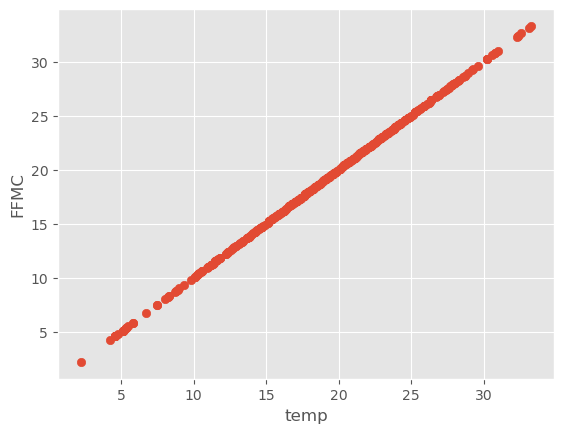

In [9]:
style.use("ggplot")  
# Apply the 'ggplot' style to the plots for a specific aesthetic.

# Set up a scatter plot
p = "temp"  
# Choose temp as the x-axis variable.

pyplot.scatter(data[p], data["temp"])  
# Create a scatter plot with 'temp' on both axes.

pyplot.xlabel(p)  
# Label the x-axis as temp.

pyplot.ylabel("FFMC")  
# Label the y-axis as FFMC.

pyplot.show()  
# Display the plot.